In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("../data/processed/cleanedData.csv")

In [3]:
X = df.drop('Target', axis=1) 
y = df['Target'] 

In [4]:
catCols = X.select_dtypes(include=['object', 'category']).columns
for col in catCols:
    X[col] = LabelEncoder().fit_transform(X[col])

In [5]:
miScores = mutual_info_classif(X, y, random_state=42)
miDf = pd.DataFrame({'Feature': X.columns, 'MI_Score': miScores})
miDf = miDf.sort_values('MI_Score', ascending=False)

C:\Users\OSHITH\AppData\Local\Temp\ipykernel_26452\400769972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MI_Score', y='Feature', data=miDf, palette='viridis')


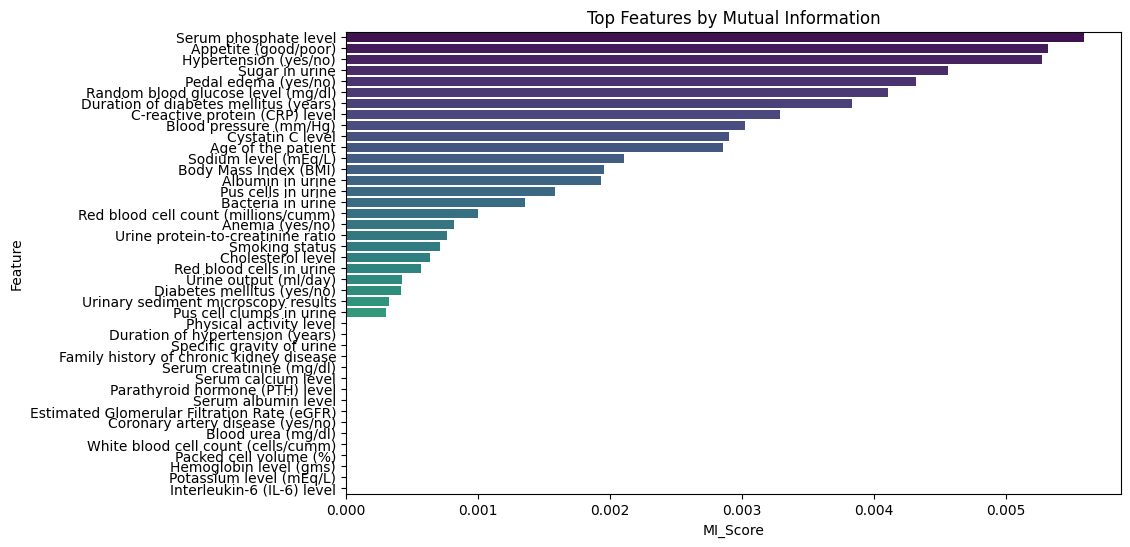

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='MI_Score', y='Feature', data=miDf, palette='viridis')
plt.title('Top Features by Mutual Information')
plt.savefig('../reports/figures/topFeatures.png')
plt.show()

In [7]:
features = [
    "Serum phosphate level","Appetite (good/poor)","Hypertension (yes/no)","Sugar in urine","Pedal edema (yes/no)","Random blood glucose level (mg/dl)","Duration of diabetes mellitus (years)","C-reactive protein (CRP) level",
    "Blood pressure (mm/Hg)","Cystatin C level","Age of the patient","Sodium level (mEq/L)","Body Mass Index (BMI)","Albumin in urine","Pus cells in urine","Bacteria in urine","Red blood cell count (millions/cumm)",
    "Anemia (yes/no)","Urine protein-to-creatinine ratio","Smoking status","Cholesterol level","Red blood cells in urine","Urine output (ml/day)","Diabetes mellitus (yes/no)","Urinary sediment microscopy results",
    "Pus cell clumps in urine"
]
categoricalCols = ["Appetite (good/poor)", "Anemia (yes/no)", "Red blood cells in urine", "Hypertension (yes/no)", "Pedal edema (yes/no)", "Pus cells in urine", "Pus cell clumps in urine", "Bacteria in urine", "Urinary sediment microscopy results", "Smoking status", "Diabetes mellitus (yes/no)"]
numericalCols = [col for col in features if col not in categoricalCols]
X = df[features]


columnTransformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categoricalCols)
    ],
    remainder='passthrough'  
)
XEncoded = columnTransformer.fit_transform(X)
encodedNames = columnTransformer.named_transformers_['cat'].get_feature_names_out(categoricalCols)
allNames = list(encodedNames) + numericalCols


dfProcessed = pd.DataFrame(XEncoded, columns=allNames)
dfProcessed['Target'] = y
dfProcessed.to_csv('../data/processed/processedData.csv', index=False)